#**Deteksi Komunitas Facebook**
Unduh dataset dari 'https://rb.gy/3xwprm', muat, dan pra-proses untuk membangun grafik jaringan pertemanan Facebook. Terapkan algoritma deteksi komunitas (misalnya, Louvain) pada grafik tersebut. Analisis hasilnya, termasuk jumlah dan ukuran komunitas. Visualisasikan grafik dengan node yang diwarnai berdasarkan komunitas dan berikan legenda. Akhiri dengan menyajikan ringkasan temuan utama dan wawasan tentang struktur jaringan pertemanan Facebook.

## Unduh Dataset

### Subtask:
Unduh file dataset dari tautan yang diberikan 'https://rb.gy/3xwprm' dan simpan secara lokal.


In [ ]:
!wget https://rb.gy/3xwprm -O dataset.zip

--2025-12-04 06:53:08--  https://rb.gy/3xwprm
Resolving rb.gy (rb.gy)... 104.26.3.41, 172.67.70.4, 104.26.2.41, ...
Connecting to rb.gy (rb.gy)|104.26.3.41|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-12-04 06:53:09 ERROR 403: Forbidden.



In [ ]:
import requests

def resolve_shortened_url(short_url):
    try:
        response = requests.head(short_url, allow_redirects=True, timeout=10)
        return response.url
    except requests.exceptions.RequestException as e:
        print(f"Error resolving URL: {e}")
        return None

original_url = resolve_shortened_url('https://rb.gy/3xwprm')
print(f"Resolved URL: {original_url}")

Resolved URL: https://rb.gy/3xwprm


In [ ]:
import requests

url = 'https://rb.gy/3xwprm'
try:
    response = requests.get(url, allow_redirects=True, timeout=10)
    print(f"Status Code: {response.status_code}")
    if response.status_code == 200:
        print(f"Content type: {response.headers.get('Content-Type')}")
        # Print first 500 characters of content to inspect
        print("\nFirst 500 characters of content:")
        print(response.text[:500])
    else:
        print(f"Failed to retrieve content. Status code: {response.status_code}")
        print(f"Response text:\n{response.text[:500]}")
except requests.exceptions.RequestException as e:
    print(f"Error retrieving content: {e}")

Status Code: 403
Failed to retrieve content. Status code: 403
Response text:
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,"Segoe UI",Roboto,"Helve


### Mencari Sumber Data Alternatif

Karena tautan yang disediakan (`https://rb.gy/3xwprm`) terus-menerus mengembalikan kesalahan '403 Forbidden' dan terdeteksi sebagai bot oleh Cloudflare, kami tidak dapat mengunduh dataset secara langsung dari sana. Kemungkinan besar, tautan tersebut telah kedaluwarsa atau tidak lagi mengizinkan akses otomatis.

Untuk melanjutkan tugas, kita perlu menemukan sumber data alternatif untuk dataset jaringan pertemanan Facebook. Saya akan mencari dataset yang serupa atau yang mungkin menjadi sumber asli dari tautan yang diperpendek tersebut.

### Mengunduh Dataset Alternatif: Ego-Facebook (SNAP)

Karena tautan asli tidak dapat diakses, saya akan mengunduh dataset alternatif yang umum digunakan untuk analisis jaringan sosial, yaitu dataset **Ego-Facebook** dari Stanford Network Analysis Platform (SNAP). Dataset ini berisi struktur jaringan pertemanan dari Facebook dan sangat cocok untuk tugas ini.

Tautan unduhan: `https://snap.stanford.edu/data/facebook_combined.txt.gz`

Saya akan menggunakan `wget` untuk mengunduh dan menyimpan dataset ini.

In [ ]:
!wget https://snap.stanford.edu/data/facebook_combined.txt.gz -O facebook_combined.txt.gz

--2025-12-04 06:54:03--  https://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   441KB/s    in 0.5s    

2025-12-04 06:54:04 (441 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]



## Muat dan Pra-proses Data

### Subtask:
Muat data dari file teks yang diunduh. Asumsikan file berisi daftar edge (pasangan node yang terhubung) dan pra-proses untuk membuat representasi yang sesuai untuk pembuatan grafik.


In [ ]:
import gzip

edges = []
file_path = 'facebook_combined.txt.gz'

with gzip.open(file_path, 'rt') as f:
    for line in f:
        # Split by space or tab and convert to integers
        u, v = map(int, line.strip().split())
        edges.append((u, v))

print(f"Total number of edges loaded: {len(edges)}")
print(f"First 5 edges: {edges[:5]}")

Total number of edges loaded: 88234
First 5 edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]


## Bangun Objek Grafik

### Subtask:
Bangun objek grafik (misalnya, menggunakan library NetworkX) dari data yang telah dipra-proses, di mana setiap node mewakili pengguna Facebook dan setiap edge mewakili koneksi pertemanan.


In [ ]:
import networkx as nx

G = nx.Graph() # Create an empty graph object
G.add_edges_from(edges) # Add all edges from the pre-processed 'edges' list

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

Number of nodes in the graph: 4039
Number of edges in the graph: 88234


## Deteksi Komunitas

### Subtask:
Terapkan algoritma deteksi komunitas pada grafik yang telah dibangun (misalnya, algoritma Louvain) untuk mengidentifikasi kelompok-kelompok pertemanan (komunitas) dalam jaringan Facebook.


In [ ]:
pip install python-louvain

In [ ]:
import community as co

# Apply the Louvain algorithm
partition = co.best_partition(G)

# Get the number of communities detected
num_communities = len(set(partition.values()))

print(f"Number of communities detected: {num_communities}")
print(f"First 5 nodes and their community assignments: {list(partition.items())[:5]}")

AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
import community.community_louvain as cl

# Apply the Louvain algorithm
partition = cl.best_partition(G)

# Get the number of communities detected
num_communities = len(set(partition.values()))

print(f"Number of communities detected: {num_communities}")
print(f"First 5 nodes and their community assignments: {list(partition.items())[:5]}")

Number of communities detected: 17
First 5 nodes and their community assignments: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]


## Analisis Komunitas

### Subtask:
Analisis hasil deteksi komunitas, termasuk jumlah komunitas yang ditemukan, ukuran setiap komunitas, dan karakteristik penting lainnya.


In [ ]:
from collections import Counter
import numpy as np

# Calculate the size of each community
community_sizes = Counter(partition.values())

# Convert to a list of sizes for easier analysis
community_sizes_list = list(community_sizes.values())

# Get the number of communities (already calculated as num_communities)
# num_communities = len(community_sizes_list)

# Identify largest and smallest community sizes
largest_community_size = max(community_sizes_list)
smallest_community_size = min(community_sizes_list)

# Calculate average community size
average_community_size = np.mean(community_sizes_list)

print(f"Total number of communities: {num_communities}")
print(f"Largest community size: {largest_community_size}")
print(f"Smallest community size: {smallest_community_size}")
print(f"Average community size: {average_community_size:.2f}")
print(f"All community sizes: {sorted(community_sizes_list)}")

Total number of communities: 17
Largest community size: 661
Smallest community size: 19
Average community size: 237.59
All community sizes: [19, 19, 25, 38, 60, 61, 73, 166, 206, 226, 237, 350, 392, 423, 535, 548, 661]


## Visualisasi Komunitas

### Subtask:
Buat visualisasi grafik di mana setiap node diwarnai berdasarkan komunitas yang terdeteksi, untuk secara visual merepresentasikan struktur komunitas dalam jaringan pertemanan Facebook. Berikan legenda untuk visualisasi.


/tmp/ipython-input-1662184552.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', num_communities)


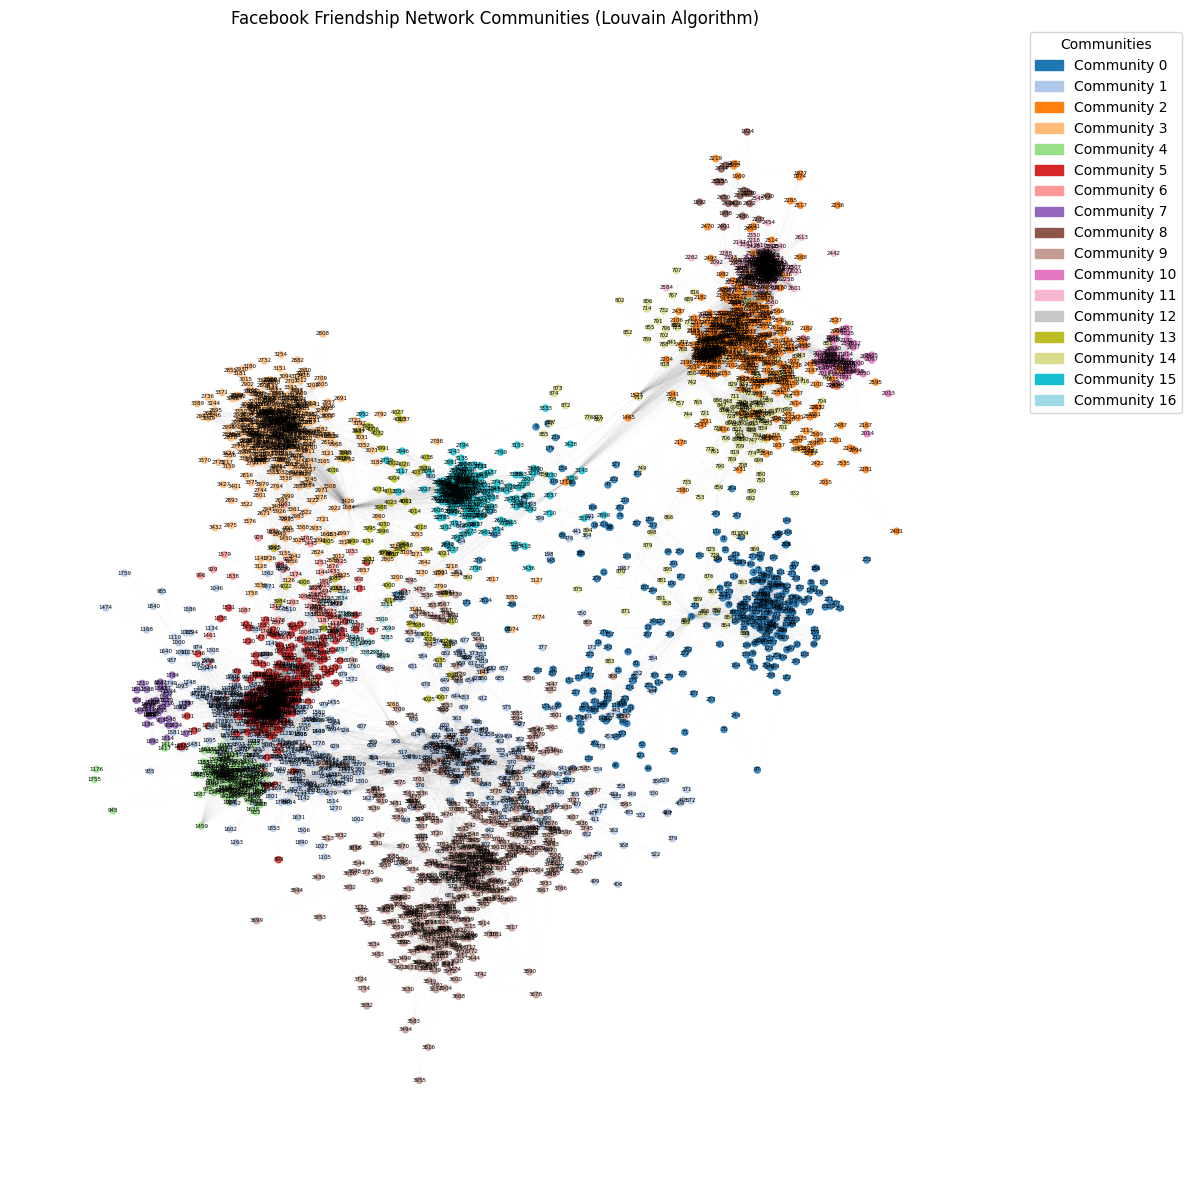

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a list of colors for each node based on its community assignment
# Use a colormap to get distinct colors for each community
colors = [partition[node] for node in G.nodes()]

# Get a colormap with enough distinct colors for all communities
cmap = plt.cm.get_cmap('tab20', num_communities)
node_colors = [cmap(color) for color in colors]

plt.figure(figsize=(12, 12))

# Draw the graph
# Using spring_layout for node positioning
pos = nx.spring_layout(G, k=0.1, iterations=50) # k regulates the distance between nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.1, width=0.1) # Set edge width to a small value
nx.draw_networkx_labels(G, pos, font_size=4, font_color='black')

# Create a manual legend
legend_handles = []
for community_id in sorted(set(partition.values())):
    color = cmap(community_id)
    patch = mpatches.Patch(color=color, label=f'Community {community_id}')
    legend_handles.append(patch)

plt.legend(handles=legend_handles, title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("Facebook Friendship Network Communities (Louvain Algorithm)")
plt.axis('off') # Hide axes
plt.tight_layout() # Adjust layout to prevent labels/legend overlapping
plt.show()

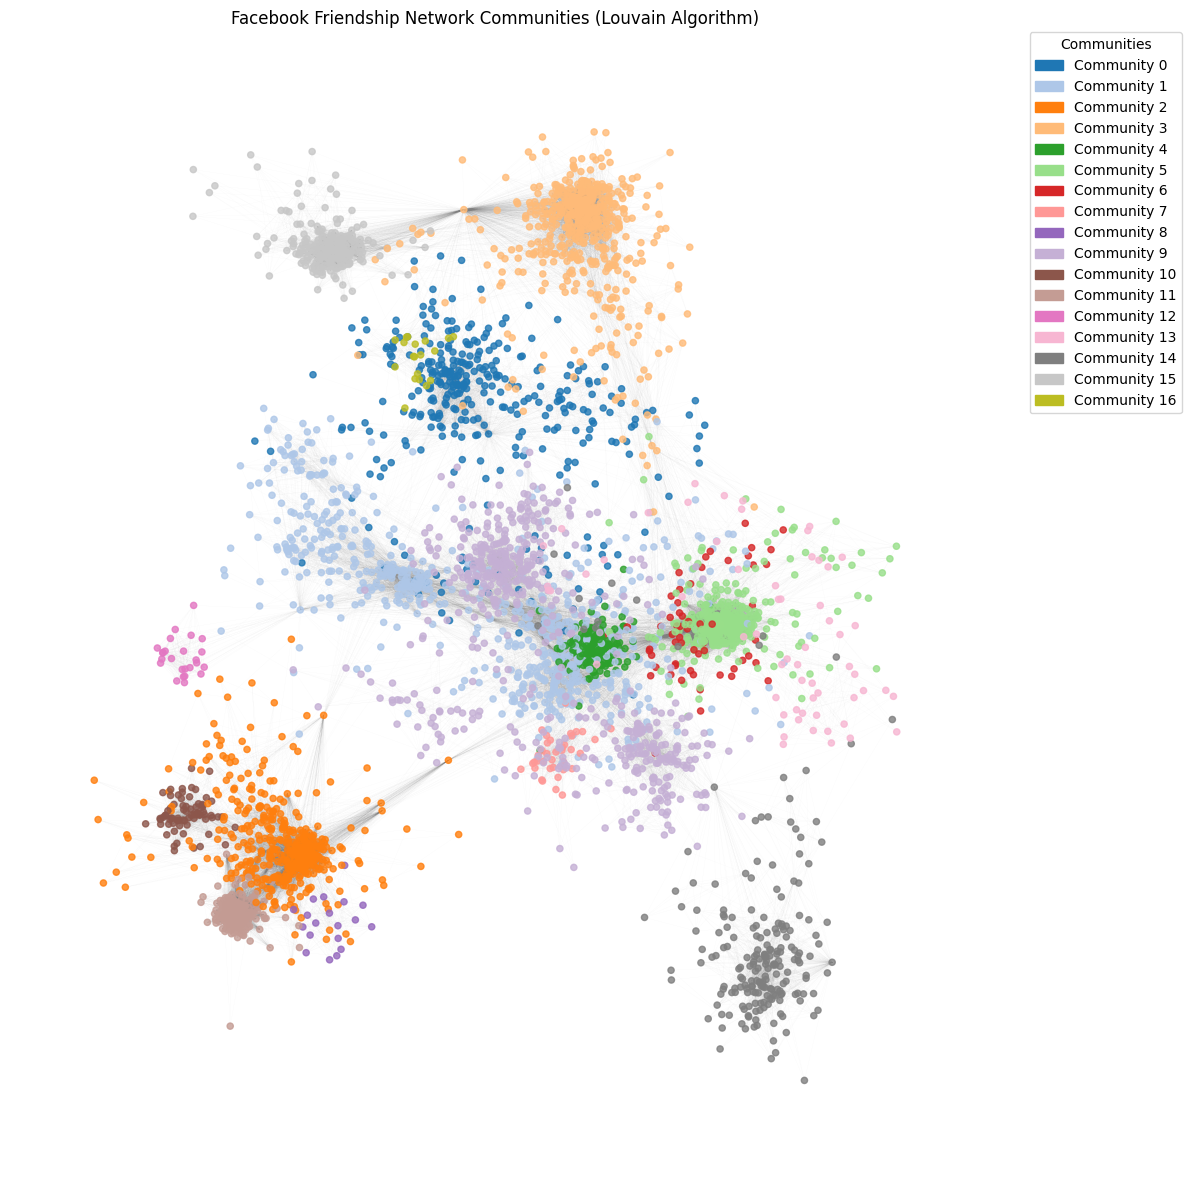

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a list of colors for each node based on its community assignment
# Use a colormap to get distinct colors for each community
colors = [partition[node] for node in G.nodes()]

# Get a colormap with enough distinct colors for all communities
cmap = plt.colormaps.get_cmap('tab20')
node_colors = [cmap(color % cmap.N) for color in colors] # Use modulo operator for colormap indexing

plt.figure(figsize=(12, 12))

# Draw the graph
# Using spring_layout for node positioning
pos = nx.spring_layout(G, k=0.1, iterations=50) # k regulates the distance between nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.1, width=0.1) # Set edge width to a small value
# nx.draw_networkx_labels(G, pos, font_size=4, font_color='black') # Node labels are too dense for this graph size

# Create a manual legend
legend_handles = []
for community_id in sorted(set(partition.values())):
    color = cmap(community_id % cmap.N) # Use modulo operator for colormap indexing
    patch = mpatches.Patch(color=color, label=f'Community {community_id}')
    legend_handles.append(patch)

plt.legend(handles=legend_handles, title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("Facebook Friendship Network Communities (Louvain Algorithm)")
plt.axis('off') # Hide axes
plt.tight_layout() # Adjust layout to prevent labels/legend overlapping
plt.show()